In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.duplicated().sum()

2

In [5]:
df.drop_duplicates(inplace = True)
df.shape

(299, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
df['Year'].value_counts()

2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

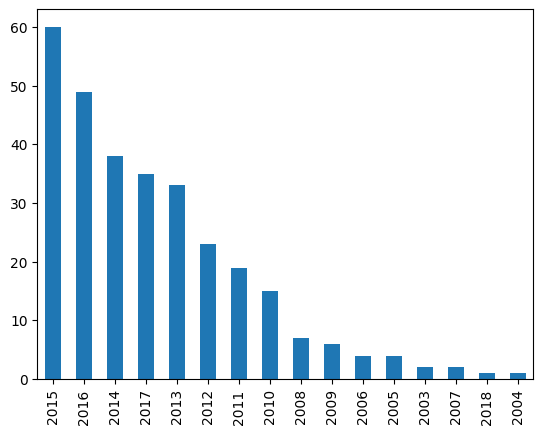

In [12]:
#cars sold in an year
df['Year'].value_counts().plot(kind = 'bar')
plt.show()

<AxesSubplot: ylabel='Fuel_Type'>

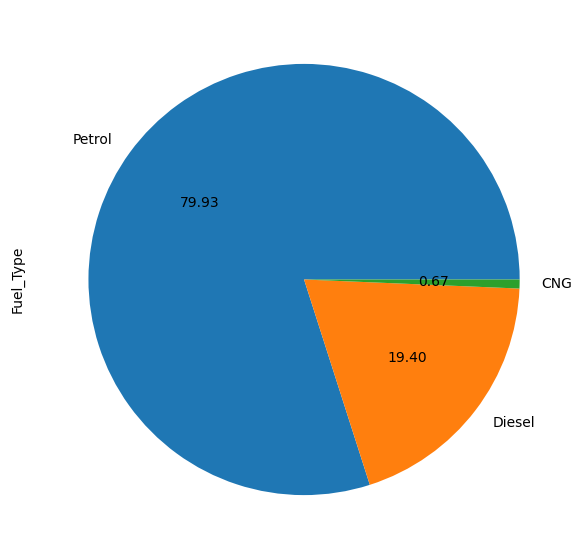

In [21]:
plt.figure(figsize=(7,7))
df['Fuel_Type'].value_counts().plot(kind = 'pie',autopct='%.2f')

In [22]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<AxesSubplot: xlabel='Year'>

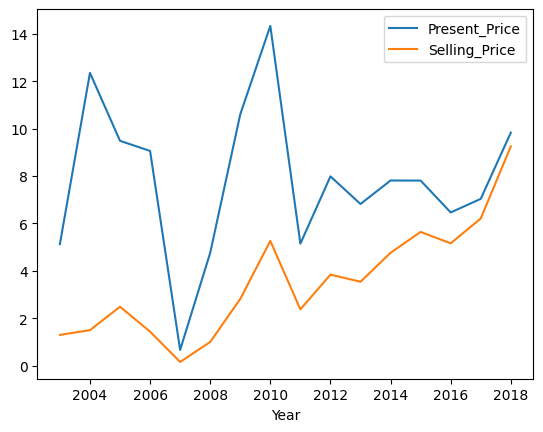

In [35]:
#average estimation of selling and present price based on years
df.groupby("Year")["Present_Price","Selling_Price"].mean().plot()

In [29]:
df["Selling_type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [30]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [36]:
df['Owner'].nunique()

3

In [68]:
df_main = df.copy()
df_main.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [69]:
df.drop(['Car_Name'],axis = 'columns',inplace = True)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [70]:
fuel_label = LabelEncoder()
selling_label = LabelEncoder()
transmission_label = LabelEncoder()

In [71]:
df['Fuel_Type'] = fuel_label.fit_transform(df['Fuel_Type'])
df['Selling_type'] = selling_label.fit_transform(df['Selling_type'])
df['Transmission'] = transmission_label.fit_transform(df['Transmission'])

In [72]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [74]:
X = df.drop('Selling_Price',axis = 'columns')
y = df['Selling_Price']

In [75]:
X.shape

(299, 7)

In [76]:
y.shape

(299,)

In [77]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
x_train.shape

(239, 7)

In [78]:
x_test.shape

(60, 7)

In [79]:
models={'LinearRegression':LinearRegression(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'SVR':SVR(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor()
}

In [80]:
report={}
for i in range(len(list(models.keys()))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc_score=r2_score(y_test,y_pred)*100
    mse=mean_squared_error(y_test,y_pred)*100
    mae=mean_absolute_error(y_test,y_pred)*100
    rmse=np.sqrt(mse)
    report[list(models.keys())[i]]={'model':list(models.values())[i],'accuracy_score':acc_score,'mean_square_error':mse,'mean_absolute_error':mae,'root_mean_square_error':rmse}

In [81]:
report

{'LinearRegression': {'model': LinearRegression(),
  'accuracy_score': 74.09934356413129,
  'mean_square_error': 667.5444100493321,
  'mean_absolute_error': 154.081195496932,
  'root_mean_square_error': 25.836880811145374},
 'DecisionTreeRegressor': {'model': DecisionTreeRegressor(),
  'accuracy_score': 77.79961541539001,
  'mean_square_error': 572.1763333333332,
  'mean_absolute_error': 117.43333333333335,
  'root_mean_square_error': 23.920207635665147},
 'SVR': {'model': SVR(),
  'accuracy_score': -9.922530736254664,
  'mean_square_error': 2833.062208795773,
  'mean_absolute_error': 312.9523010061965,
  'root_mean_square_error': 53.22651790973906},
 'RandomForestRegressor': {'model': RandomForestRegressor(),
  'accuracy_score': 53.54036148681387,
  'mean_square_error': 1197.4164461500009,
  'mean_absolute_error': 143.92783333333344,
  'root_mean_square_error': 34.60370567078042},
 'ExtraTreesRegressor': {'model': ExtraTreesRegressor(),
  'accuracy_score': 80.4936364439012,
  'mean_sq

In [82]:
accuracy=0
for i in range(len(list(report))):
    if accuracy < list(report.values())[i]['accuracy_score']:
        accuracy=list(report.values())[i]['accuracy_score']
        final_model=list(report.values())[i]['model']

In [83]:
final_model.fit(x_train,y_train)

ExtraTreesRegressor()

In [84]:
y_pred = final_model.predict(x_test)

In [85]:
r2_score(y_test,y_pred)

0.819608384376039

In [87]:
prediction=[]
for i in  y_pred:
    prediction.append(round(i,2))
prediction_data_frame=pd.DataFrame({'predicted':prediction,'original_value':y_test})
prediction_data_frame.reset_index(drop=True,inplace=True)

In [88]:
prediction_data_frame

,predicted,original_value
0,9.28,8.99
1,8.60,8.35
2,0.47,0.45
3,7.15,7.45
4,12.93,5.25
5,5.15,5.25
6,6.21,5.85
7,1.21,1.15
8,7.94,9.25
9,0.46,0.38


In [92]:
range(len(y_pred))

range(0, 60)

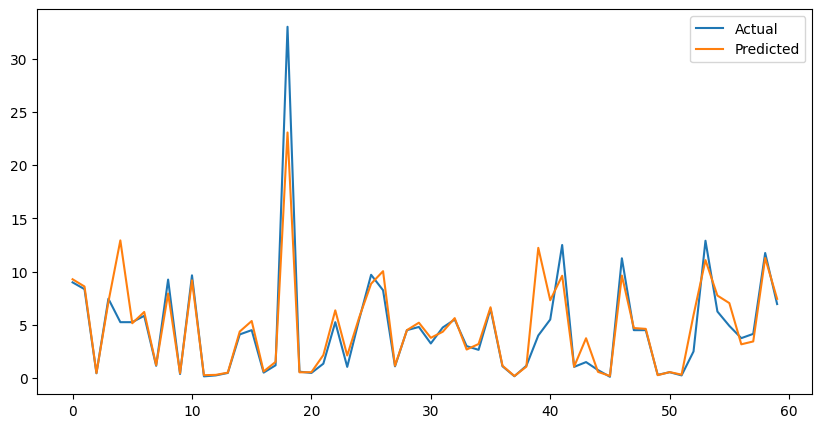

In [100]:
plt.figure(figsize=(10,5))
plt.plot(range(len(y_pred)),prediction_data_frame['original_value'])
plt.plot(range(len(y_pred)),prediction_data_frame['predicted'])
plt.legend(['Actual','Predicted'])
plt.show()